In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

Dataset overview

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


I start by taking a subset of users, and seeing what their preferred genres are. I focus on two genres: Romance and Scifi, and compute the average rating

In [5]:
# Calculate the average rating of romance and scifi movies
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

        rating  rating
userId                
1         4.31    4.22
2         4.50    3.88
3         0.50    4.20
4         3.38    2.83
5         3.09    2.50
6         3.61    3.48
7         2.65    3.15
8         3.50    3.25
9         3.17    3.00
10        3.33    2.00
11        4.23    3.50
12        4.57    4.50
13        3.67    4.20
14        3.57    3.50
15        3.88    3.58
16        3.65    3.69
17        3.93    4.40
18        3.68    3.64
19        2.68    2.56
20        3.99    3.23
21        3.24    3.45
22        2.20    2.10
23        3.33    3.91
24        3.55    3.64
25        5.00    4.72
26        3.00    2.00
27        4.13    3.38
28        2.89    3.18
29        4.33    4.11
30        5.00    4.65
...        ...     ...
581       4.22    4.28
582       3.83    3.94
583       3.44     NaN
584       4.35    4.23
585       4.25    3.25
586       4.14    4.40
587       4.13    4.23
588       3.00    2.67
589       4.57    4.33
590       3.44    3.20
591       3

,avg_romance_rating,avg_scifi_rating
userId,,
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


Let's bias our dataset a little by removing people who like both scifi and romance, just so that our clusters tend to define them as liking one genre more than the other.

In [6]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,userId,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


 So we can see we have 162 users, and for each user we have their average rating of the romance and sci movies they've watched.

Let us plot this dataset:

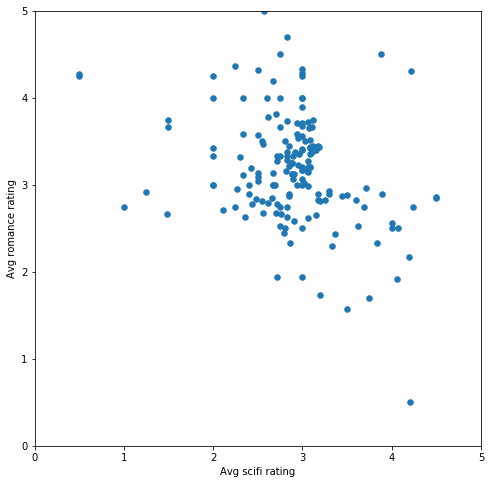

In [7]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

So do k-means

In [8]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

K=2

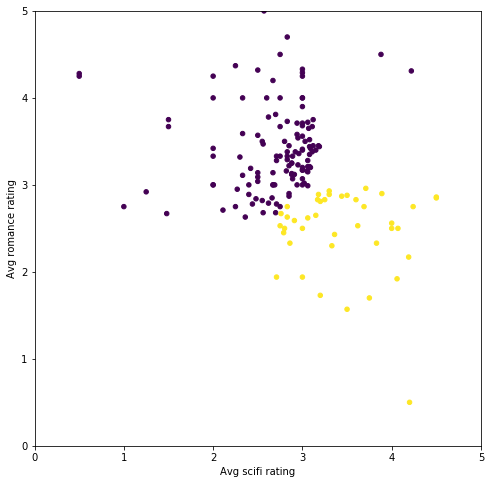

In [10]:
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2, random_state=0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

We can see that the groups are mostly based on how each person rated romance movies. If their average rating of romance movies is over 3 or close to 3 stars, then they belong to one group. Otherwise, they belong to the other group.

K = 3

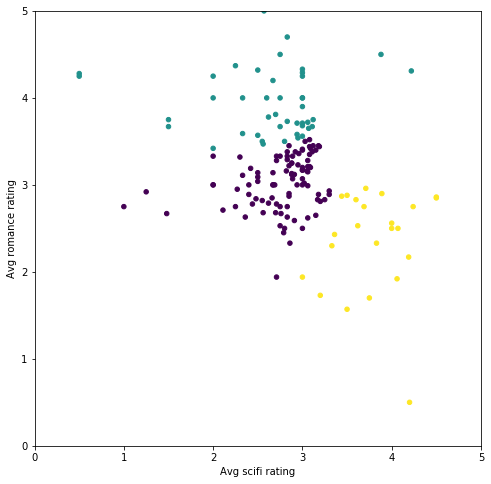

In [11]:
# TODO: Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3, random_state=1)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

 The groups are:
people who like romance but not scifi
people who like scifi but not romance
people who like both scifi and romance

In [12]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


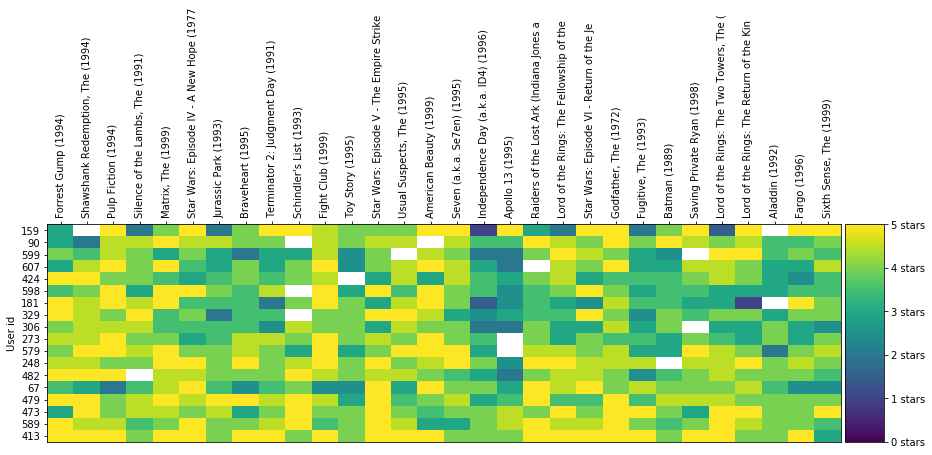

In [14]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [16]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

In [17]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [18]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

C:\Users\HP\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\HP\helper.py:117: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


cluster # 18
# of users in cluster: 16. # of users in plot: 16


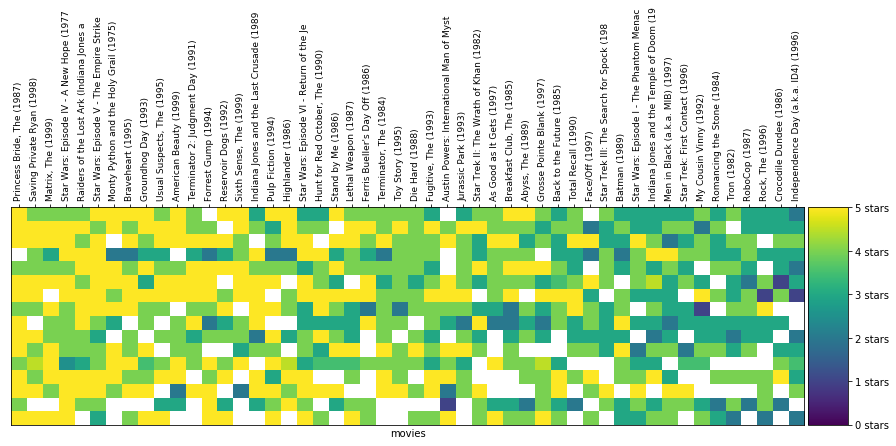

cluster # 11
# of users in cluster: 214. # of users in plot: 70


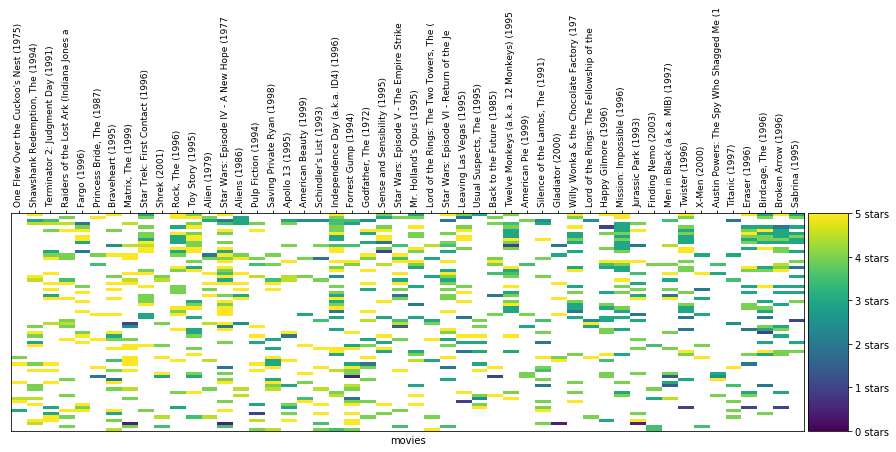

cluster # 7
# of users in cluster: 32. # of users in plot: 32


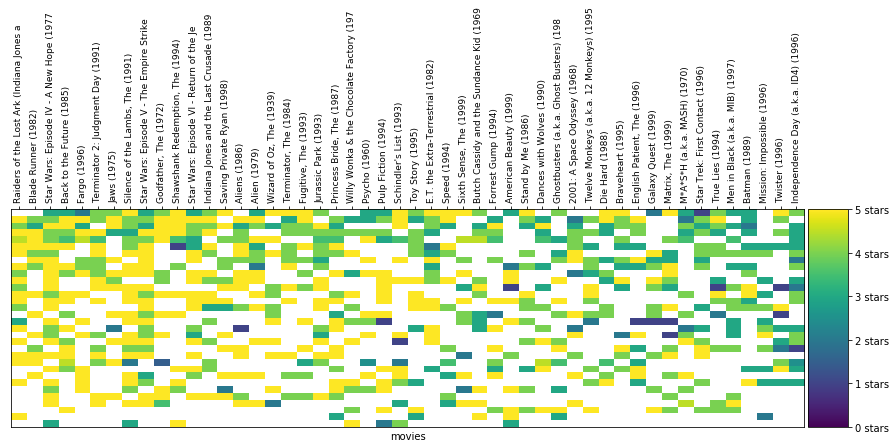

cluster # 1
# of users in cluster: 87. # of users in plot: 70


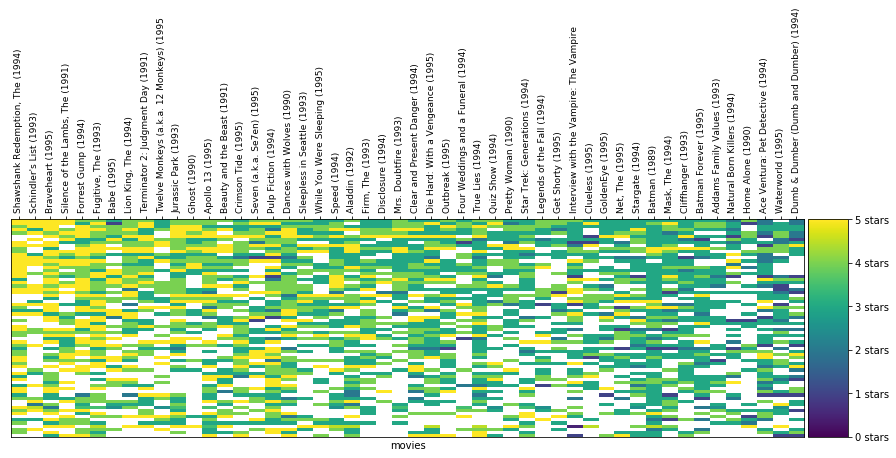

cluster # 5
# of users in cluster: 30. # of users in plot: 30


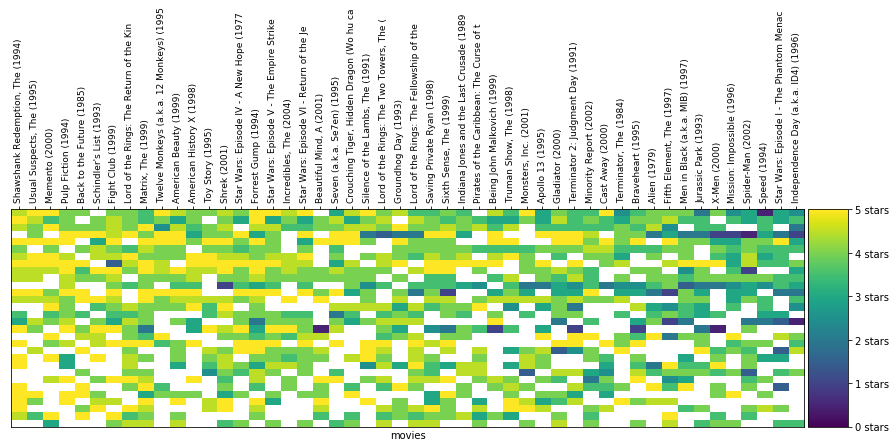

cluster # 17
# of users in cluster: 121. # of users in plot: 70


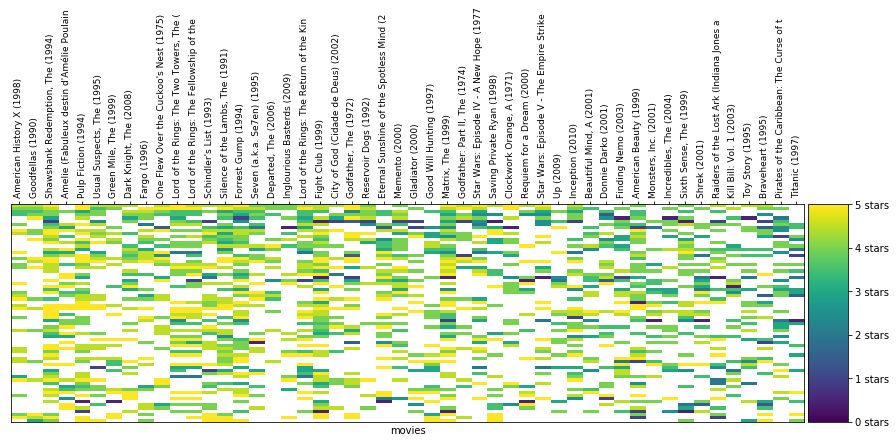

cluster # 9
# of users in cluster: 28. # of users in plot: 28


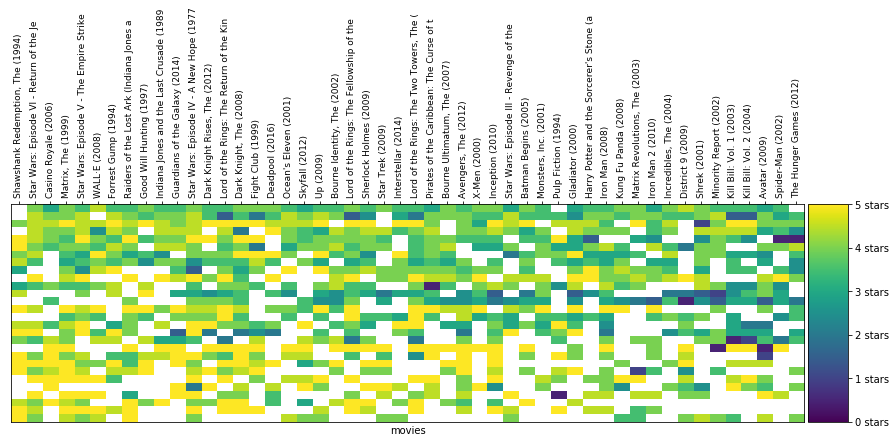

cluster # 4
# of users in cluster: 15. # of users in plot: 15


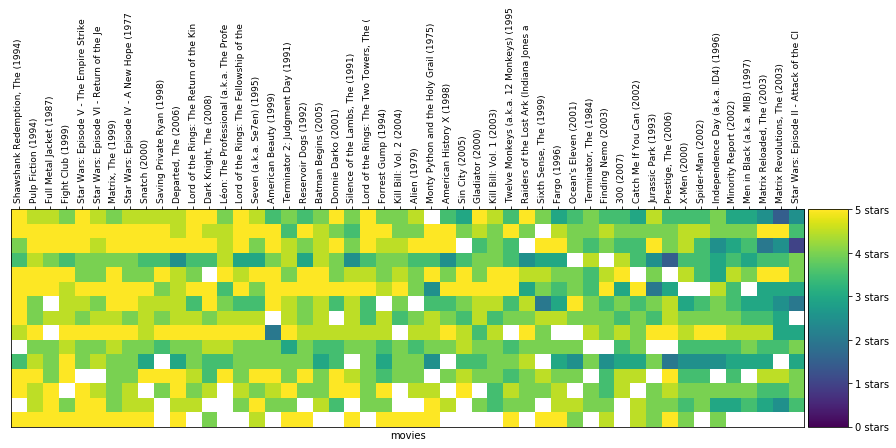

cluster # 6
# of users in cluster: 19. # of users in plot: 19


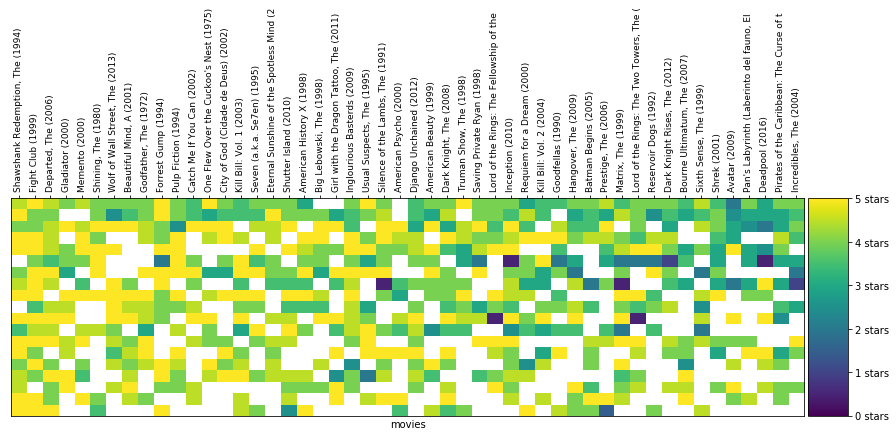

cluster # 2
# of users in cluster: 11. # of users in plot: 11


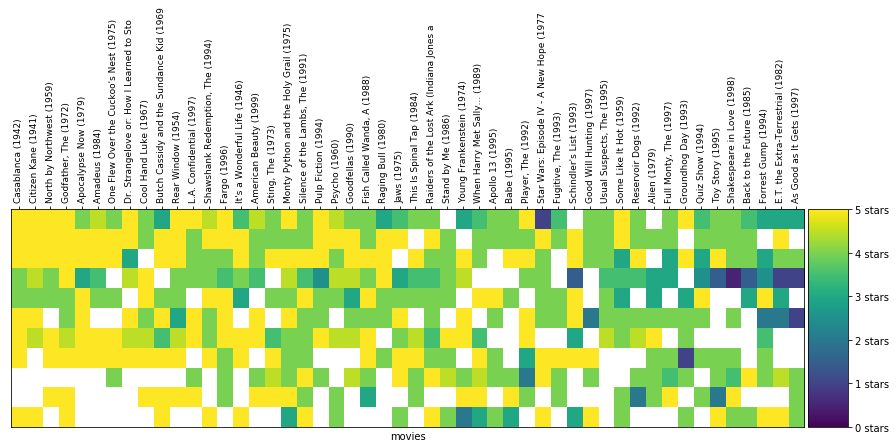

In [20]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

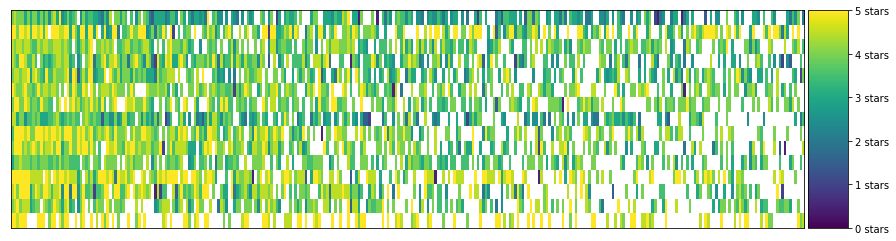

In [21]:
# TODO: Pick a cluster ID from the clusters above
cluster_number = 4

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [22]:
cluster.fillna('').head()

,Terminator 2: Judgment Day (1991),Pulp Fiction (1994),Seven (a.k.a. Se7en) (1995),"Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),"Departed, The (2006)","Lord of the Rings: The Return of the King, The (2003)",Minority Report (2002),Kill Bill: Vol. 1 (2003),"Lord of the Rings: The Two Towers, The (2002)",...,Wedding Crashers (2005),"Nutty Professor, The (1996)",To Kill a Mockingbird (1962),Harry Potter and the Order of the Phoenix (2007),"League of Extraordinary Gentlemen, The (a.k.a. LXG) (2003)","Grand Budapest Hotel, The (2014)","Incredible Hulk, The (2008)","Graduate, The (1967)",Mr. & Mrs. Smith (2005),Mad Max (1979)
7,4.0,4.5,4.0,4.0,4.0,3.0,4,3,4,4,...,,,,3,2,3.5,2.5,4,,2
8,5.0,5.0,4.0,5.0,5.0,4.5,5,3.5,5,5,...,4,2,4.5,3,,5,,5,,
0,4.5,4.0,4.5,4.5,4.0,4.5,4.5,4,3.5,3.5,...,,,4.5,,,4,3.5,4.5,,3.5
4,4.5,4.0,3.5,5.0,5.0,4.5,3.5,3.5,4.5,3.5,...,3,1,,2.5,1.5,,,,3.5,
12,4.0,4.5,4.5,4.0,4.5,4.5,5,3,4.5,5,...,,,,,,3.5,3,,1,4


In [25]:
# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 11

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]


Godfather, The (1972)                         4.772727
Shawshank Redemption, The (1994)              4.653846
No Country for Old Men (2007)                 4.500000
Shining, The (1980)                           4.500000
Boondock Saints, The (2000)                   4.454545
Zombieland (2009)                             4.428571
Willy Wonka & the Chocolate Factory (1971)    4.428571
Graduate, The (1967)                          4.416667
Goodfellas (1990)                             4.333333
28 Days Later (2002)                          4.318182
Blade Runner (1982)                           4.300000
American Gangster (2007)                      4.285714
Aliens (1986)                                 4.277778
Psycho (1960)                                 4.250000
Godfather: Part II, The (1974)                4.222222
Few Good Men, A (1992)                        4.214286
Guardians of the Galaxy (2014)                4.214286
Avatar (2009)                                 4.200000
Hangover, 